In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [7]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

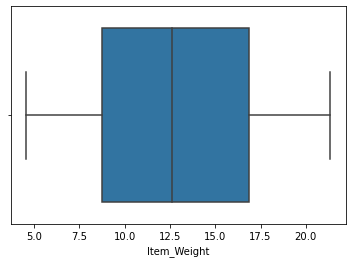

In [8]:
sns.boxplot(df['Item_Weight'])

### The boxplot shows there are no outliers. Thus the missing values can be replaced with mean of the data as the data is not skewed.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

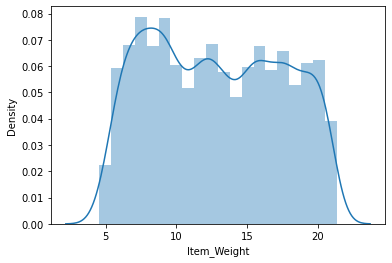

In [9]:
sns.distplot(df['Item_Weight'])

In [10]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

### Outlet size being a categorical column, replacing the missing values with mode

In [13]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Thus all null values are removed

## Check  for duplicates

In [16]:
dupli=df.duplicated()

In [17]:
dupli.sum()

0

#### No duplicates

## Removing Outliers

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

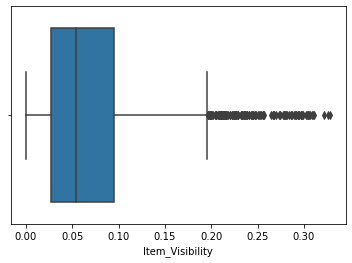

In [18]:
sns.boxplot(df['Item_Visibility'])

In [19]:
def handle_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

In [20]:
lowvisib,uppvisib=handle_outlier(df['Item_Visibility'])

In [21]:
df['Item_Visibility']=np.where(df['Item_Visibility']>uppvisib,uppvisib,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lowvisib,lowvisib,df['Item_Visibility'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

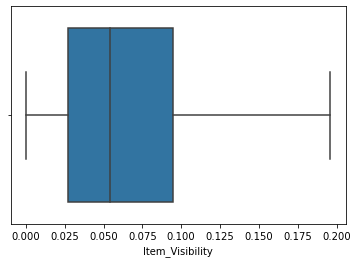

In [22]:
sns.boxplot(df['Item_Visibility'])

In [23]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

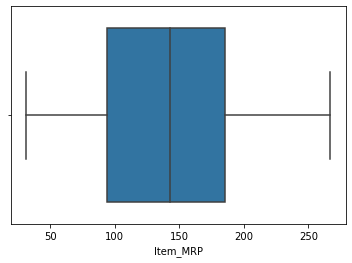

In [24]:
sns.boxplot(df['Item_MRP'])

In [25]:
df['Item_MRP'].isnull().sum()

0

In [26]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

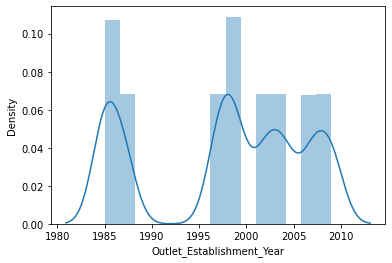

In [27]:
sns.distplot(df['Outlet_Establishment_Year'])

In [28]:
df['Outlet_Establishment_Year'].isnull().sum()

0

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

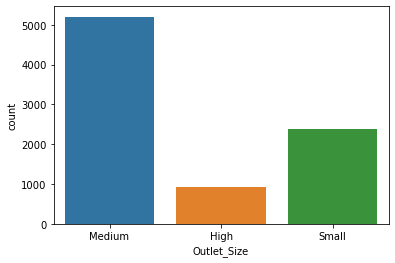

In [29]:
sns.countplot(df['Outlet_Size'])

In [30]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

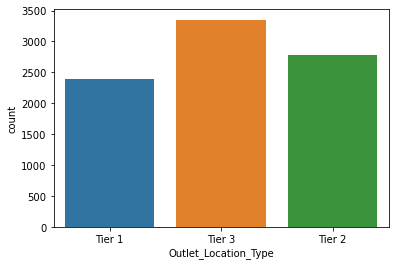

In [31]:
sns.countplot(df['Outlet_Location_Type'])

In [32]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

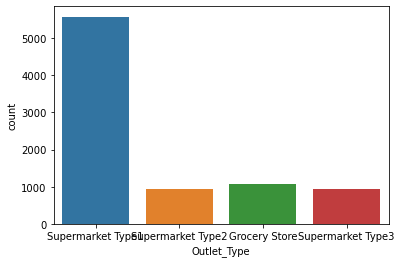

In [33]:
sns.countplot(df['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

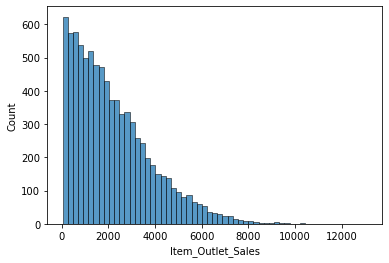

In [34]:
sns.histplot(df['Item_Outlet_Sales'])

In [35]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

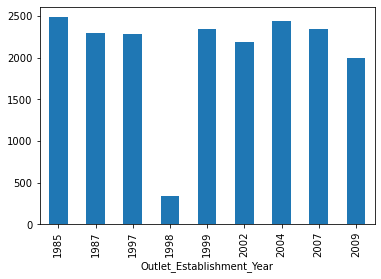

In [36]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

### Label encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [40]:
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,9
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1


In [42]:
cols_to_encode=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [43]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [44]:
print('Original Categories:')
print(df['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(df['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [45]:
le=LabelEncoder()
for i in cols_to_encode:
    df[i]=le.fit_transform(df[i])

In [46]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Item_Fat_Content_0         8523 non-null   uint8  
 9   Item_Fat_Content_1         8523 non-null   uint8  
 10  Outlet_Location_Type_0     8523 non-null   uint8  
 11  Outlet_Location_Type_1     8523 non-null   uint8  
 12  Outlet_Location_Type_2     8523 non-null   uint8  
 13  Outlet_Size_0              8523 non-null   uint8

In [48]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [49]:
#df.drop(['df.drop(Item_Outlet_Sales)'])

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

In [52]:
df['Outlet_Identifier'].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [53]:
df=pd.get_dummies(df,columns=['Outlet_Identifier'])

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,9.30,0.016047,249.8092,3735.1380,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,443.4228,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,2097.2700,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,732.3800,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,994.7052,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         8523 non-null   object 
 1   Item_Weight             8523 non-null   float64
 2   Item_Visibility         8523 non-null   float64
 3   Item_MRP                8523 non-null   float64
 4   Item_Outlet_Sales       8523 non-null   float64
 5   Item_Fat_Content_0      8523 non-null   uint8  
 6   Item_Fat_Content_1      8523 non-null   uint8  
 7   Outlet_Location_Type_0  8523 non-null   uint8  
 8   Outlet_Location_Type_1  8523 non-null   uint8  
 9   Outlet_Location_Type_2  8523 non-null   uint8  
 10  Outlet_Size_0           8523 non-null   uint8  
 11  Outlet_Size_1           8523 non-null   uint8  
 12  Outlet_Size_2           8523 non-null   uint8  
 13  Outlet_Type_0           8523 non-null   uint8  
 14  Outlet_Type_1           8523 non-null   

In [56]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Outlet_Sales', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9',
       'Outlet_Identifier_0', 'Outlet_Identifier_1', 'Outlet_Identifier_2',
       'Outlet_Identifier_3', 'Outlet_Identifier_4', 'Outlet_Identifier_5',
       'Outlet_Identifier_6', 'Outlet_Identifier_7', 'Outlet_Identifier_8',
       'Outlet_Identifier_9'],
      dtype='object')

In [59]:
X=df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1',
       'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9',
       'Outlet_Identifier_0', 'Outlet_Identifier_1', 'Outlet_Identifier_2',
       'Outlet_Identifier_3', 'Outlet_Identifier_4', 'Outlet_Identifier_5',
       'Outlet_Identifier_6', 'Outlet_Identifier_7', 'Outlet_Identifier_8',
       'Outlet_Identifier_9']]

In [60]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.30,0.016047,249.8092,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
y=df['Item_Outlet_Sales']

In [62]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear regression

In [67]:
from sklearn.metrics import r2_score

In [68]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)
r2_score(y_test,pred)

0.568039289301467

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_jobs=-1,n_estimators=600,max_depth=6,min_samples_leaf=5)
rf.fit(X_train,y_train)
#np.sqrt(mean_squared_error(train_targets,rf.predict(train_inputs)))
pred=rf.predict(X_test)
r2_score(y_test,pred)

0.6009442560247886

### XGBoost

In [73]:
import xgboost

In [77]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
pred_Xg=xgb.predict(X_test)
print(r2_score(y_test,pred_Xg))

0.5284945847631548


## Test data

In [78]:
test_df=pd.read_csv('Test.csv')

In [79]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [81]:
test_df.shape

(5681, 11)

In [82]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [83]:
test_df['Outlet_Size']=test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0])

In [84]:
lowvisib,uppvisib=handle_outlier(test_df['Item_Visibility'])

In [85]:
test_df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [86]:
test_df['Outlet']=le.fit_transform(test_df['Outlet_Identifier'])

In [87]:
test_df['Item_Visibility']=np.where(test_df['Item_Visibility']>uppvisib,uppvisib,test_df['Item_Visibility'])
test_df['Item_Visibility']=np.where(test_df['Item_Visibility']<lowvisib,lowvisib,test_df['Item_Visibility'])

In [89]:
#Get the first two characters of ID:
test_df['Item_Type_Combined'] = test_df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test_df['Item_Type_Combined'] = test_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test_df['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [90]:
print('Original Categories:')
print(test_df['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(test_df['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [92]:
le=LabelEncoder()
for i in cols_to_encode:
    test_df[i]=le.fit_transform(test_df[i])

In [93]:
test_df = pd.get_dummies(test_df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [95]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750,0.007565,107.8622,OUT049,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300,0.038428,87.3198,OUT017,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600,0.099575,241.7538,OUT010,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315,0.015388,155.0340,OUT017,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,NaN,0.118599,234.2300,OUT027,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [96]:
test_df['Outlet_Identifier']=le.fit_transform(test_df['Outlet_Identifier'])

In [97]:
test_df=pd.get_dummies(test_df,columns=['Outlet_Identifier'])

In [98]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDW58,20.750,0.007565,107.8622,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300,0.038428,87.3198,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600,0.099575,241.7538,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315,0.015388,155.0340,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,NaN,0.118599,234.2300,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [99]:
test_df.isnull().sum()

Item_Identifier             0
Item_Weight               976
Item_Visibility             0
Item_MRP                    0
Item_Fat_Content_0          0
Item_Fat_Content_1          0
Outlet_Location_Type_0      0
Outlet_Location_Type_1      0
Outlet_Location_Type_2      0
Outlet_Size_0               0
Outlet_Size_1               0
Outlet_Size_2               0
Outlet_Type_0               0
Outlet_Type_1               0
Outlet_Type_2               0
Outlet_Type_3               0
Item_Type_Combined_0        0
Item_Type_Combined_1        0
Item_Type_Combined_2        0
Outlet_0                    0
Outlet_1                    0
Outlet_2                    0
Outlet_3                    0
Outlet_4                    0
Outlet_5                    0
Outlet_6                    0
Outlet_7                    0
Outlet_8                    0
Outlet_9                    0
Outlet_Identifier_0         0
Outlet_Identifier_1         0
Outlet_Identifier_2         0
Outlet_Identifier_3         0
Outlet_Ide

In [100]:
test_df['Item_Weight']=test_df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         5681 non-null   object 
 1   Item_Weight             5681 non-null   float64
 2   Item_Visibility         5681 non-null   float64
 3   Item_MRP                5681 non-null   float64
 4   Item_Fat_Content_0      5681 non-null   uint8  
 5   Item_Fat_Content_1      5681 non-null   uint8  
 6   Outlet_Location_Type_0  5681 non-null   uint8  
 7   Outlet_Location_Type_1  5681 non-null   uint8  
 8   Outlet_Location_Type_2  5681 non-null   uint8  
 9   Outlet_Size_0           5681 non-null   uint8  
 10  Outlet_Size_1           5681 non-null   uint8  
 11  Outlet_Size_2           5681 non-null   uint8  
 12  Outlet_Type_0           5681 non-null   uint8  
 13  Outlet_Type_1           5681 non-null   uint8  
 14  Outlet_Type_2           5681 non-null   

In [104]:
test_df.drop(['Item_Identifier'],axis=1,inplace=True)

In [105]:
y_test_pred_lin=linreg.predict(test_df)

In [108]:
y_test_pred_lin

array([1846.15389531, 1592.77141219, 1922.14232057, ..., 1856.76829084,
       3618.034312  , 1274.17293877])

In [109]:
y_test_pred_rf=rf.predict(test_df)

In [110]:
y_test_pred_rf

array([1631.42332538, 1381.6338855 ,  579.19593541, ..., 2007.35692649,
       3644.96469957, 1272.28619024])

In [111]:
y_test_pred_xgb=xgb.predict(test_df)

In [112]:
y_test_pred_xgb

array([1597.4178, 1484.3185, 1338.5515, ..., 2132.2383, 5293.5195,
       1194.6399], dtype=float32)